In [5]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
from collections import defaultdict


In [6]:
df = pd.read_csv('/Users/ashleyphilip/Downloads/Top_songs.csv')
df

,Track Name,Album Name,Artist Name(s),Release Date,Duration (ms),Popularity,Genres,Record Label,Danceability,Energy,Key,Loudness,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Rank
0,Carnival of the Animals: The Swan,Saint-Saëns: Carnival of the Animals: The Swan,"Camille Saint-Saëns,Isata Kanneh-Mason,Jeneba ...",9/25/20,150146,69,classical,Decca Music Group Ltd.,0.213,0.0656,7,-24.810,1,0.0467,0.99200,0.969,0.0699,0.0384,65.023,89
1,September - Instrumental,September,Goomp,2/2/23,190107,67,NaN,Goomp,0.709,0.0710,1,-28.565,1,0.0519,0.99600,0.950,0.1040,0.6310,141.267,95
2,Swimming,Swimming,Flawed Mangoes,1/10/24,188048,71,NaN,its nbd,0.498,0.3680,9,-13.158,1,0.0291,0.91300,0.914,0.1020,0.6380,163.995,69
3,Oblivion,Visions,Grimes,2/21/12,251266,70,art pop,4AD,0.697,0.5290,2,-8.838,1,0.0338,0.11500,0.896,0.0895,0.4860,155.974,47
4,Blue Monday,Substance,New Order,8/17/87,449160,73,"new wave,synthpop,post-punk,madchester",Rhino,0.762,0.6510,0,-13.340,1,0.0655,0.00198,0.856,0.1110,0.9410,130.395,57
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120,Tongue Tied,Never Trust a Happy Song,GROUPLOVE,9/2/11,218013,81,indie,Canvasback/ATL,0.560,0.9360,3,-5.835,1,0.0439,0.00847,0.000,0.1610,0.3710,112.960,93
121,Same Old Love,Revival (Deluxe),Selena Gomez,10/9/15,229080,70,pop,Selena Gomez PS,0.672,0.5930,11,-4.010,0,0.0304,0.02230,0.000,0.2140,0.4380,98.020,97
122,This Is How We Do,PRISM (Deluxe),Katy Perry,10/18/13,204285,59,pop,Capitol Records (CAP),0.690,0.6360,9,-6.028,0,0.0457,0.02030,0.000,0.1470,0.7990,96.002,99
123,Just Like a Movie,Trust Fall / Just Like A Movie,Wallows,9/6/19,247613,54,indie,Atlantic Records,0.449,0.8250,11,-5.177,1,0.0370,0.00121,0.000,0.2080,0.2230,135.934,100


In [7]:
df.describe()

,Duration (ms),Popularity,Danceability,Energy,Key,Loudness,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Rank
count,125.000000,125.00000,125.000000,125.000000,125.000000,125.000000,125.000000,125.000000,125.000000,125.000000,125.000000,125.000000,125.000000,125.000000
mean,208959.464000,71.69600,0.608008,0.638613,5.472000,-7.196624,0.712000,0.053551,0.201603,0.122931,0.161228,0.508005,123.024592,63.000000
std,49016.443926,13.13836,0.143776,0.178020,3.828113,3.420803,0.454653,0.042846,0.263309,0.258036,0.120564,0.239224,25.692233,36.228442
min,74378.000000,9.00000,0.213000,0.065600,0.000000,-28.565000,0.000000,0.025200,0.000009,0.000000,0.026600,0.038400,62.007000,1.000000
25%,183240.000000,66.00000,0.516000,0.509000,2.000000,-8.029000,0.000000,0.031500,0.013500,0.000000,0.089500,0.347000,107.015000,32.000000
50%,210251.000000,75.00000,0.624000,0.677000,6.000000,-6.264000,1.000000,0.040200,0.076400,0.000090,0.113000,0.486000,120.151000,63.000000
75%,230053.000000,80.00000,0.709000,0.771000,9.000000,-5.478000,1.000000,0.053100,0.269000,0.036600,0.179000,0.709000,139.318000,94.000000
max,449160.000000,95.00000,0.897000,0.947000,11.000000,-1.896000,1.000000,0.322000,0.996000,0.969000,0.691000,0.965000,184.483000,125.000000


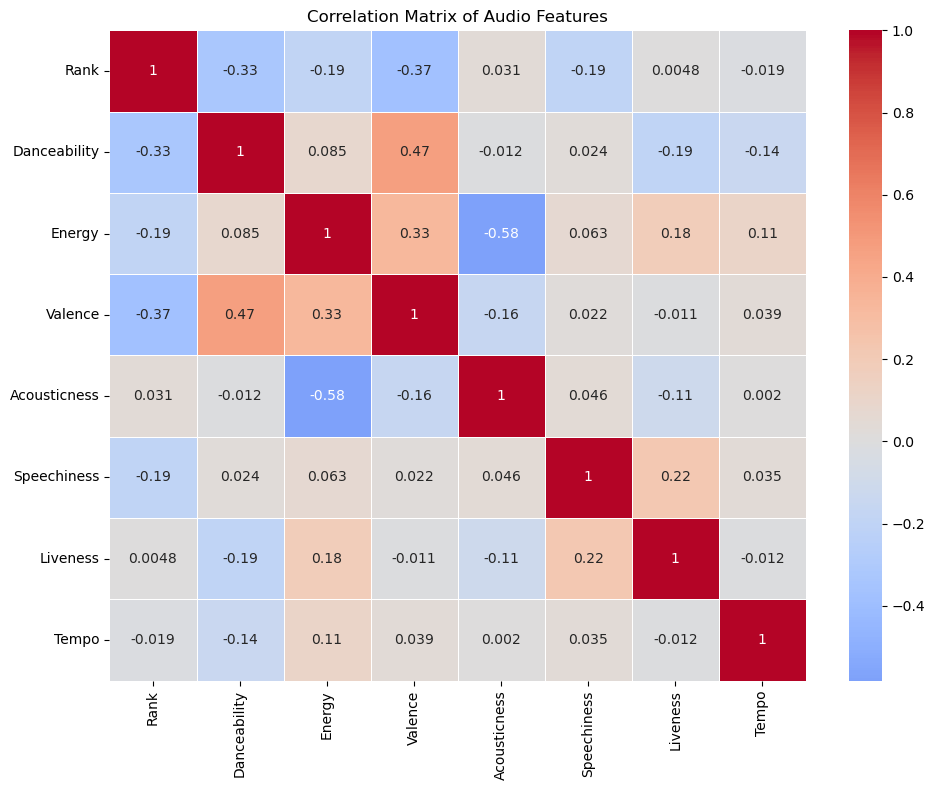

In [13]:
# Correlation heat map matrix -> I want to look at the correlation between audio features and my ranking
audio_features = ['Rank', 'Danceability', 'Energy', 'Valence', 'Acousticness', 'Speechiness', 'Liveness', 'Tempo']
corr_matrix = df[audio_features].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, linewidths=0.5)
plt.title('Correlation Matrix of Audio Features')
plt.tight_layout()
plt.show()
# I found that valence has a negative correlation with my ranking, so I tend to like sadder songs.

number of unique genres: 35


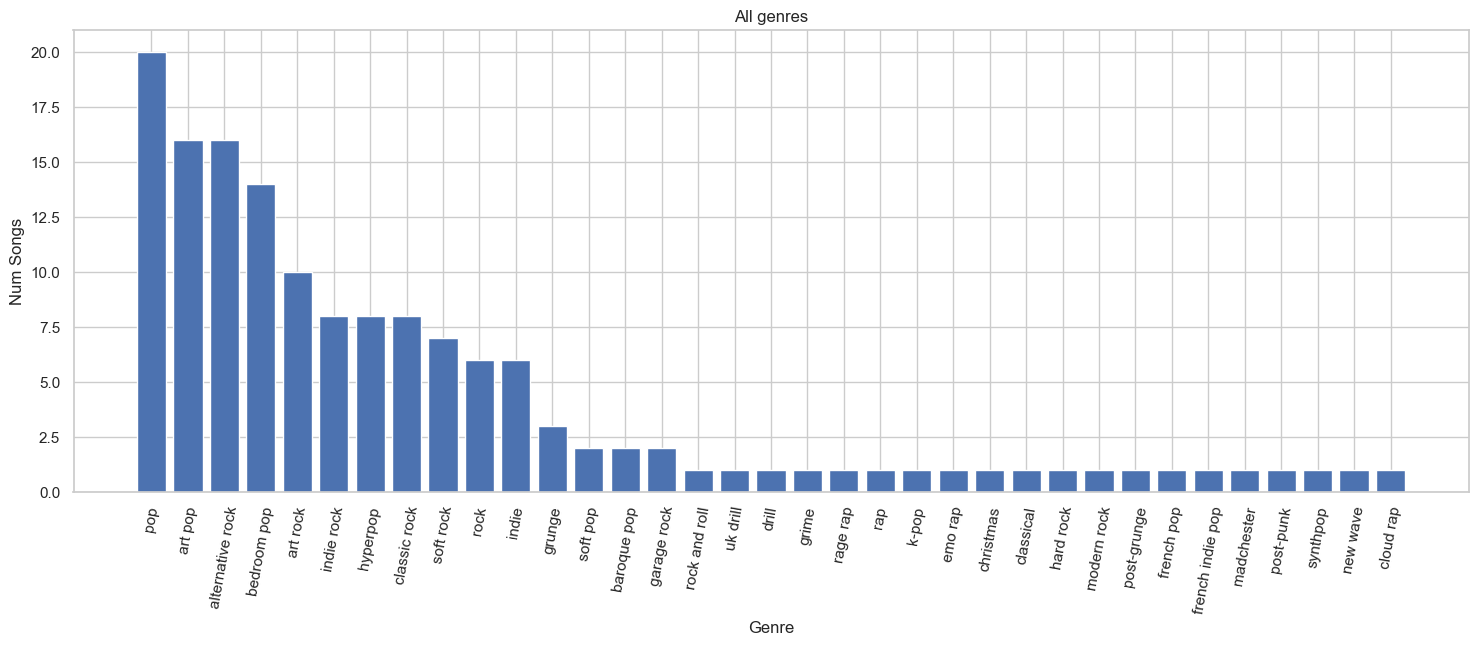

In [204]:
# Count per genre bar chart -> I want to see which genres I listen to the most
genres = defaultdict(int)
for i,song in df.iterrows():
    if type(song['Genres']) is str:
        for genre in song['Genres'].split(','):
            if len(genre) > 0: 
                genres[genre] += 1

genres = pd.DataFrame(genres.items(), columns=['Genre', 'Num Songs']
                          ).sort_values('Num Songs', ascending=False).reset_index(drop=True)
print("number of unique genres:", genres.shape[0])
plt.figure(figsize=(18, 6))
plt.bar(genres['Genre'], genres['Num Songs'])
plt.xticks(rotation=80)
plt.xlabel(genres.columns[0])
plt.ylabel(genres.columns[1])
plt.title('All genres');
# I tend to listen to pop, art pop, and alternative rock. Not sure what the difference is between pop and art pop,  but I did expect pop and rock to be my top categories


/var/folders/2q/vrhjtfm179n6cfr1bpx0r37h0000gn/T/ipykernel_36619/907577501.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=label_counts.values, y=label_counts.index, palette='viridis')


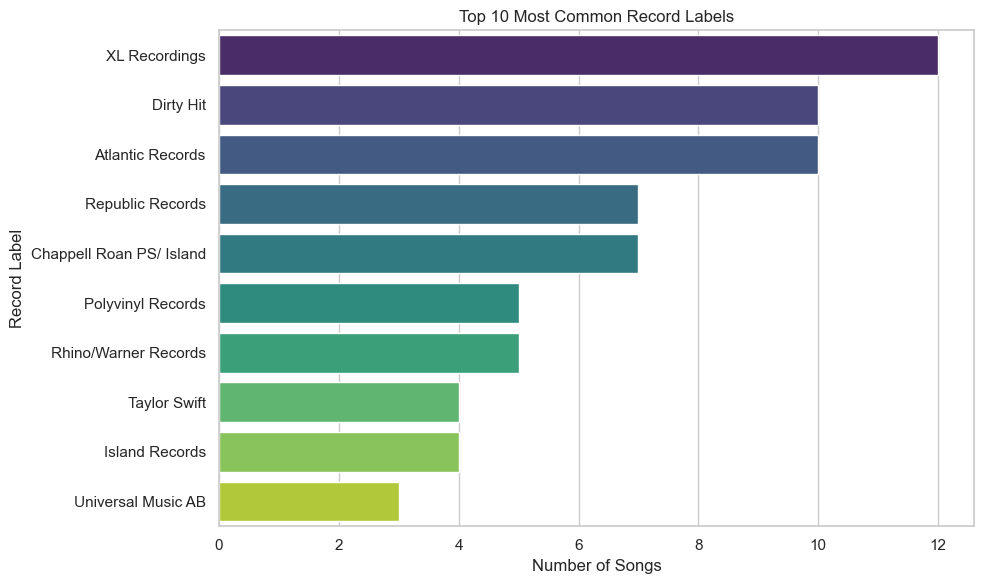

In [205]:
# Most common record labels bar chart
plt.figure(figsize=(10, 6))
label_counts = df['Record Label'].value_counts().head(10)
sns.barplot(x=label_counts.values, y=label_counts.index, palette='viridis')
plt.title('Top 10 Most Common Record Labels')
plt.xlabel('Number of Songs')
plt.ylabel('Record Label')
plt.tight_layout()
plt.show()
# My top labels focus on indie music and still prioritize commerical growth

/var/folders/2q/vrhjtfm179n6cfr1bpx0r37h0000gn/T/ipykernel_36619/2613628363.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Release Date'] = pd.to_datetime(df['Release Date'], errors='coerce')


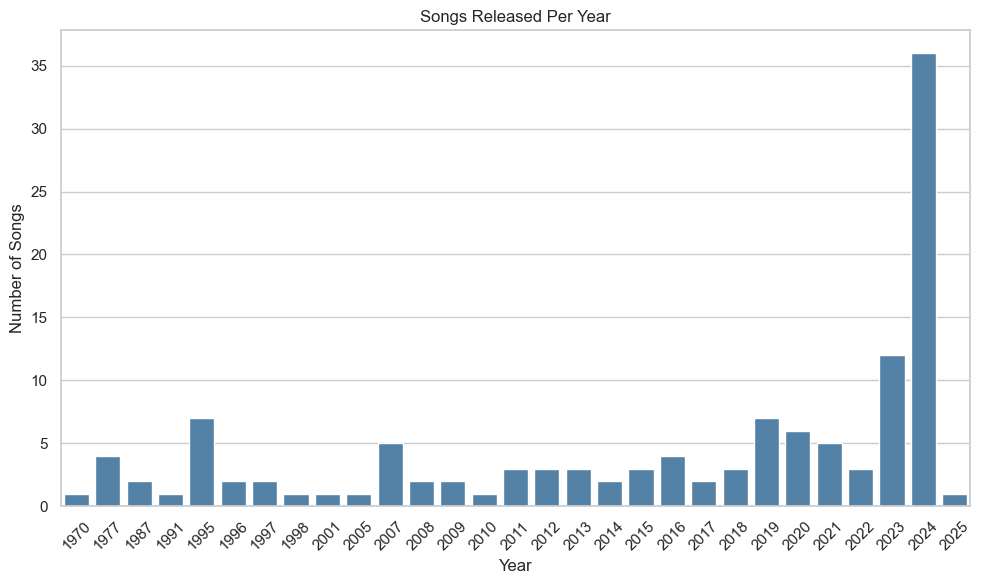

In [206]:
# Songs released per year bar chart -> I want to look at the comparison between my music across the years
df['Release Date'] = pd.to_datetime(df['Release Date'], errors='coerce')
df = df.dropna(subset=['Release Date'])
df = df[df['Release Date'].dt.year <= 2025]
df.at[66, 'Release Date'] = pd.to_datetime('1970-01-01')

df['Year'] = df['Release Date'].dt.year
songs_per_year = df['Year'].value_counts().sort_index()
plt.figure(figsize=(10, 6))
sns.barplot(x=songs_per_year.index, y=songs_per_year.values, color='steelblue')
plt.title('Songs Released Per Year')
plt.xlabel('Year')
plt.ylabel('Number of Songs')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
# I tend to like more recent music but there are some peaks at 1977, 1995, and 2007. These may be released within the same album.

Average song popularity:  67.41304347826087
Median song popularity:  69.5
Max song popularity:  95.0
Max song popularity: 9.0 | Track Name: Hide Away


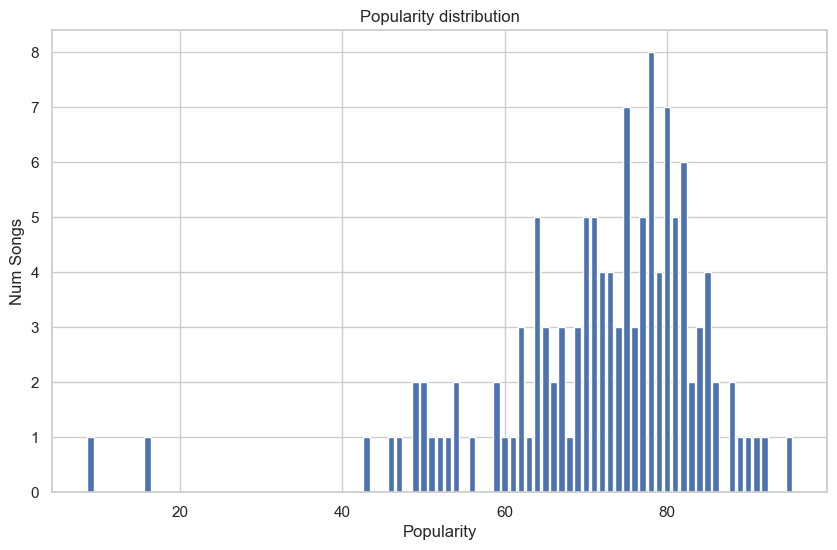

In [207]:
# Song popularity bar chart -> I want to see how popular my music taste is
popularity = defaultdict(int)
for i,song in df.iterrows():
    popularity[song['Popularity']] += 1
popularity = pd.DataFrame(popularity.items(), columns=['Popularity', 'Num Songs']
                          ).sort_values('Popularity')
plt.figure(figsize=(10, 6))
plt.bar(popularity['Popularity'].values, popularity['Num Songs'].values)
plt.xlabel(popularity.columns[0])
plt.ylabel(popularity.columns[1])
plt.title('Popularity distribution');
print("Average song popularity: ", popularity['Popularity'].mean())
print("Median song popularity: ", popularity['Popularity'].median())
print("Max song popularity: ", popularity['Popularity'].max())
print("Min song popularity:", min_pop_row['Popularity'], "| Track Name:", min_pop_row['Track Name'])
# It's a pretty wide range, but I definitely like popular music

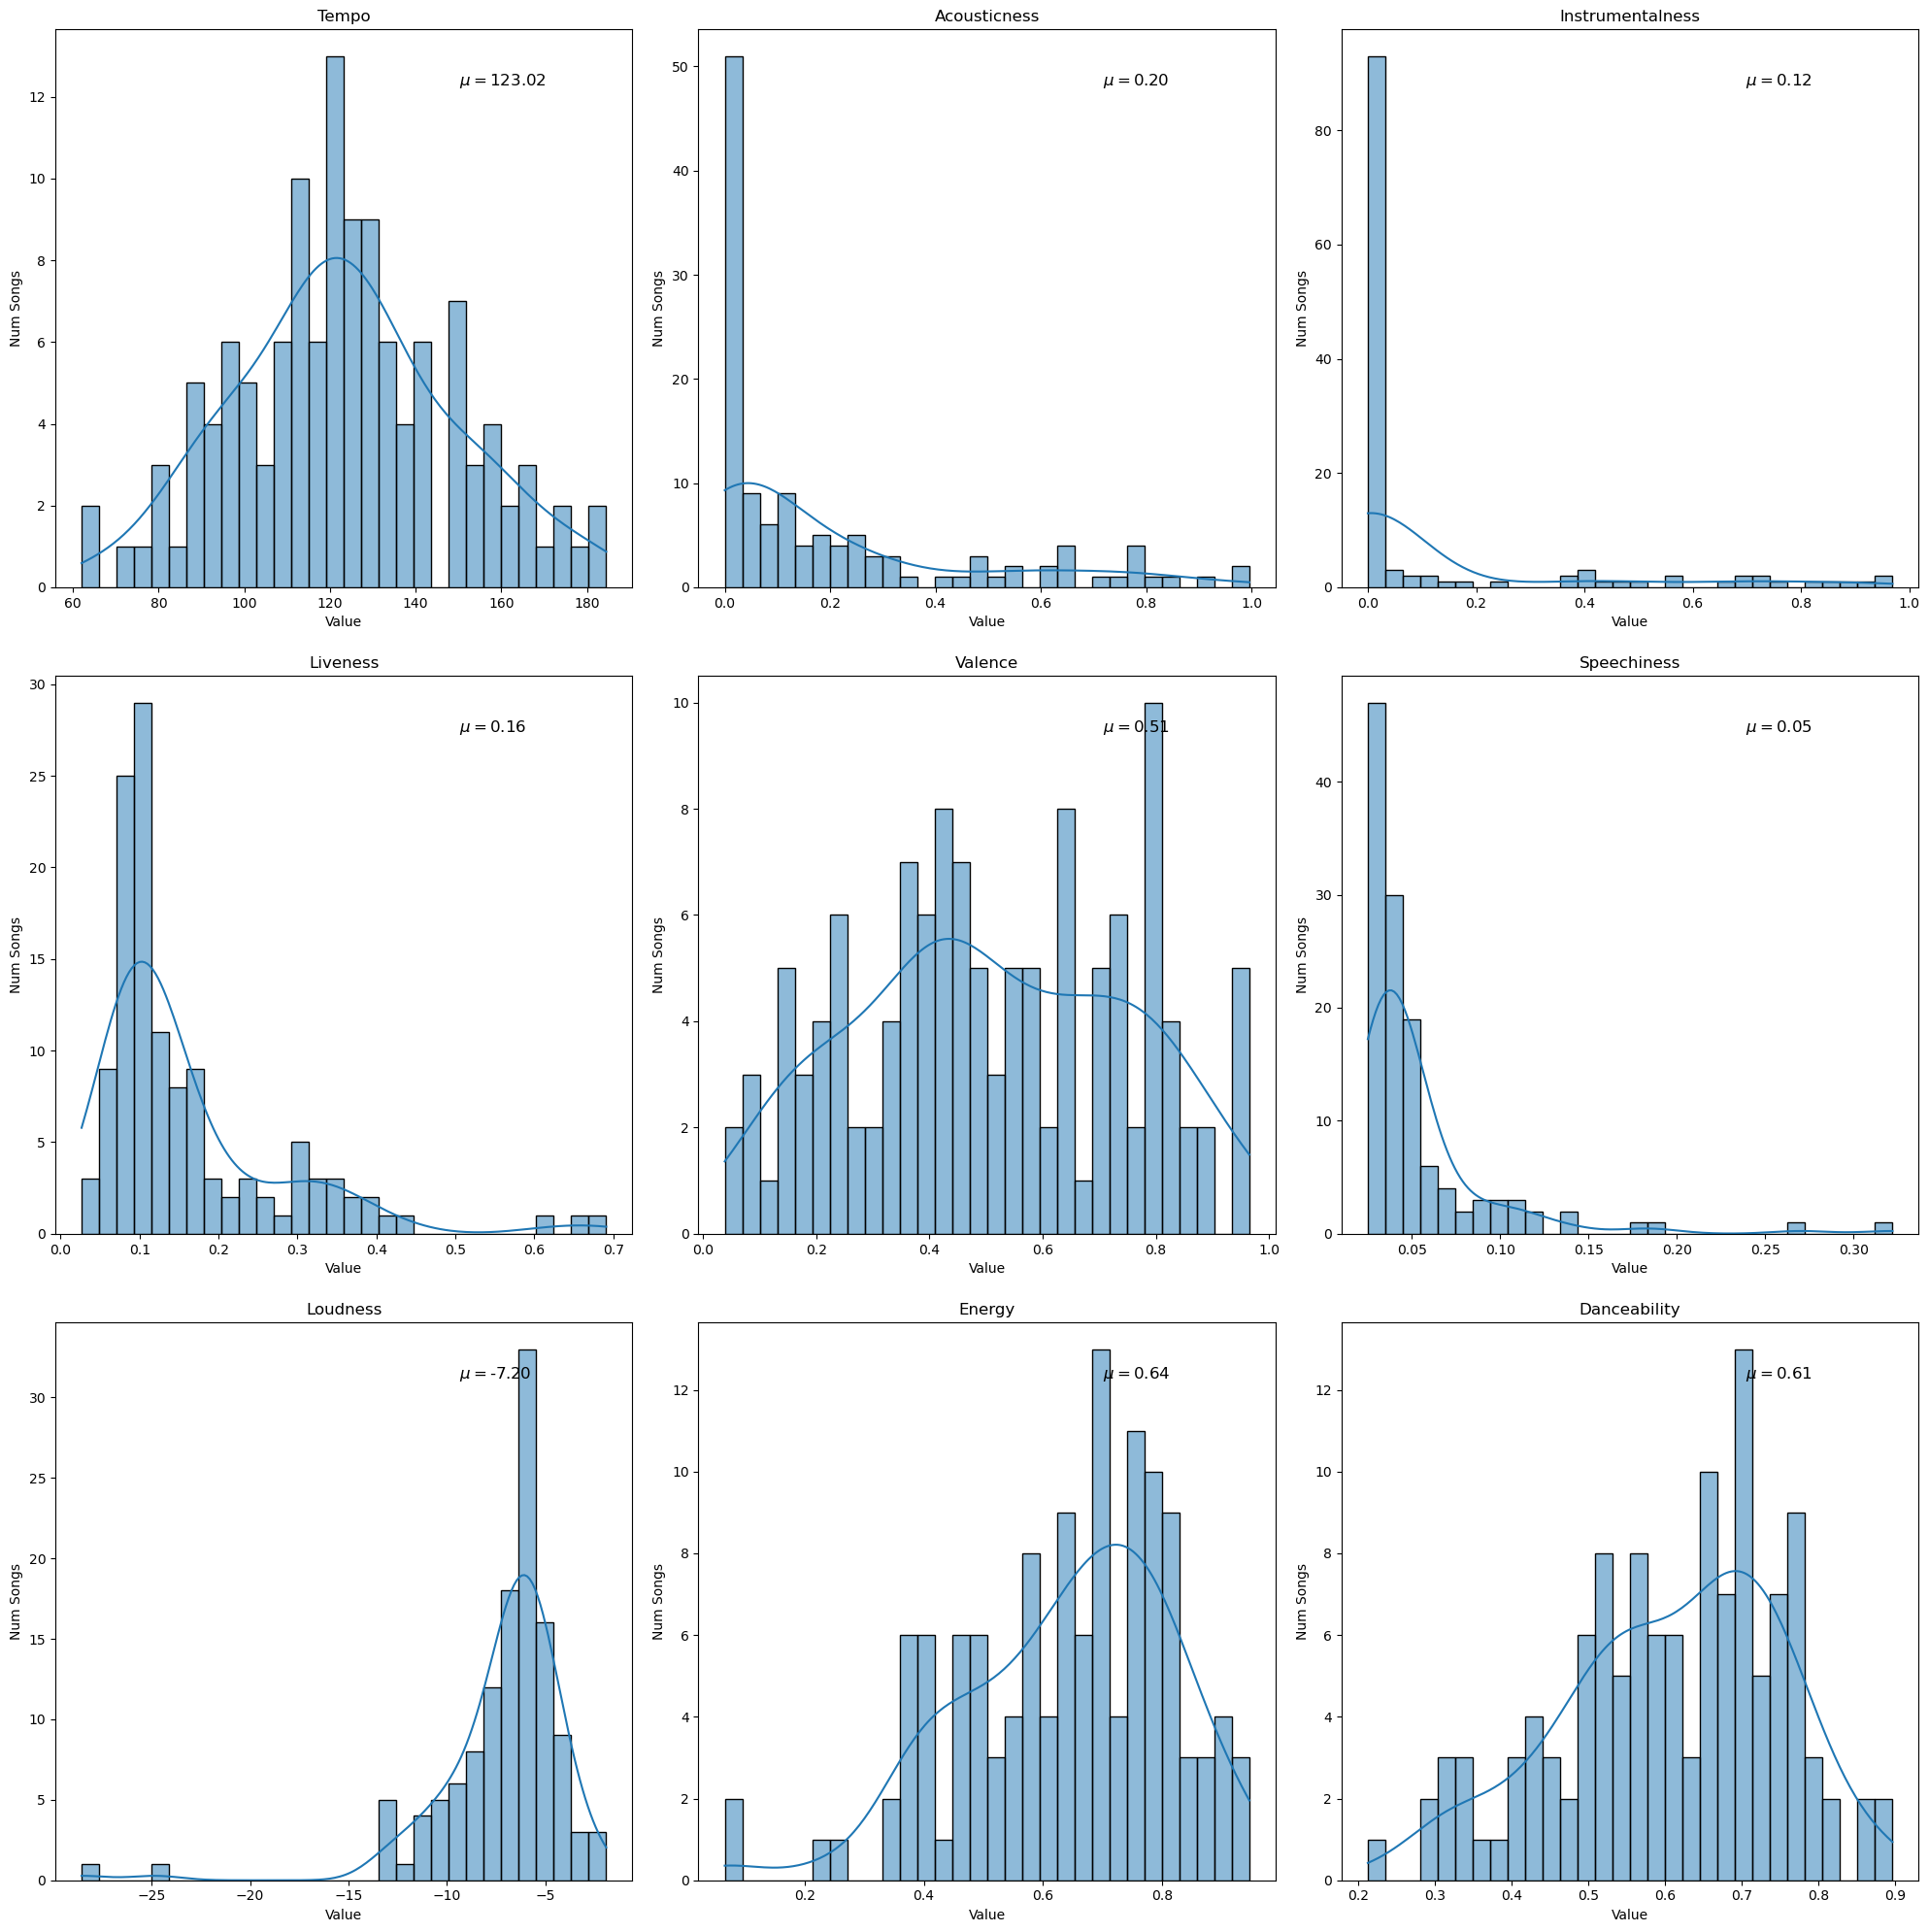

In [15]:
# Audio feature distribution graph -> I want to see the musical attributes of my favorite songs 
plt.figure(figsize=(20, 20))
categories = ['Tempo', 'Acousticness', 'Instrumentalness', 'Liveness',
              'Valence', 'Speechiness', 'Loudness', 'Energy', 'Danceability']
for i, category in enumerate(categories):
    plt.subplot(3, 3, i + 1)
    sns.histplot(df[category], kde=True, bins=30)
    mean_value = df[category].mean()
    plt.text(plt.xlim()[1] - (plt.xlim()[1] - plt.xlim()[0])*0.3,
             plt.ylim()[1]*0.9, r'$\mu=$' + f"{mean_value:.2f}", fontsize=12)
    plt.xlabel('Value')
    plt.ylabel('Num Songs')
    plt.title(category)
plt.tight_layout(h_pad=2)
plt.show()
# Some interesting insights I found was that I tend to like upbeat, and produced tracks (low acousticness, high energy, high danceability) and vocals are very common (low instrumentalness and speechiness).